In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-prediction-dataset/placementdata.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/placement-prediction-dataset/placementdata.csv",index_col=0)

In [4]:
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,,,,,,,,,,,
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  object 
 7   PlacementTraining          10000 non-null  object 
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 937.5+ KB


**EDA**

since the datasets was mostly number ,i used pairplot to find any good correlation between the numbers

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

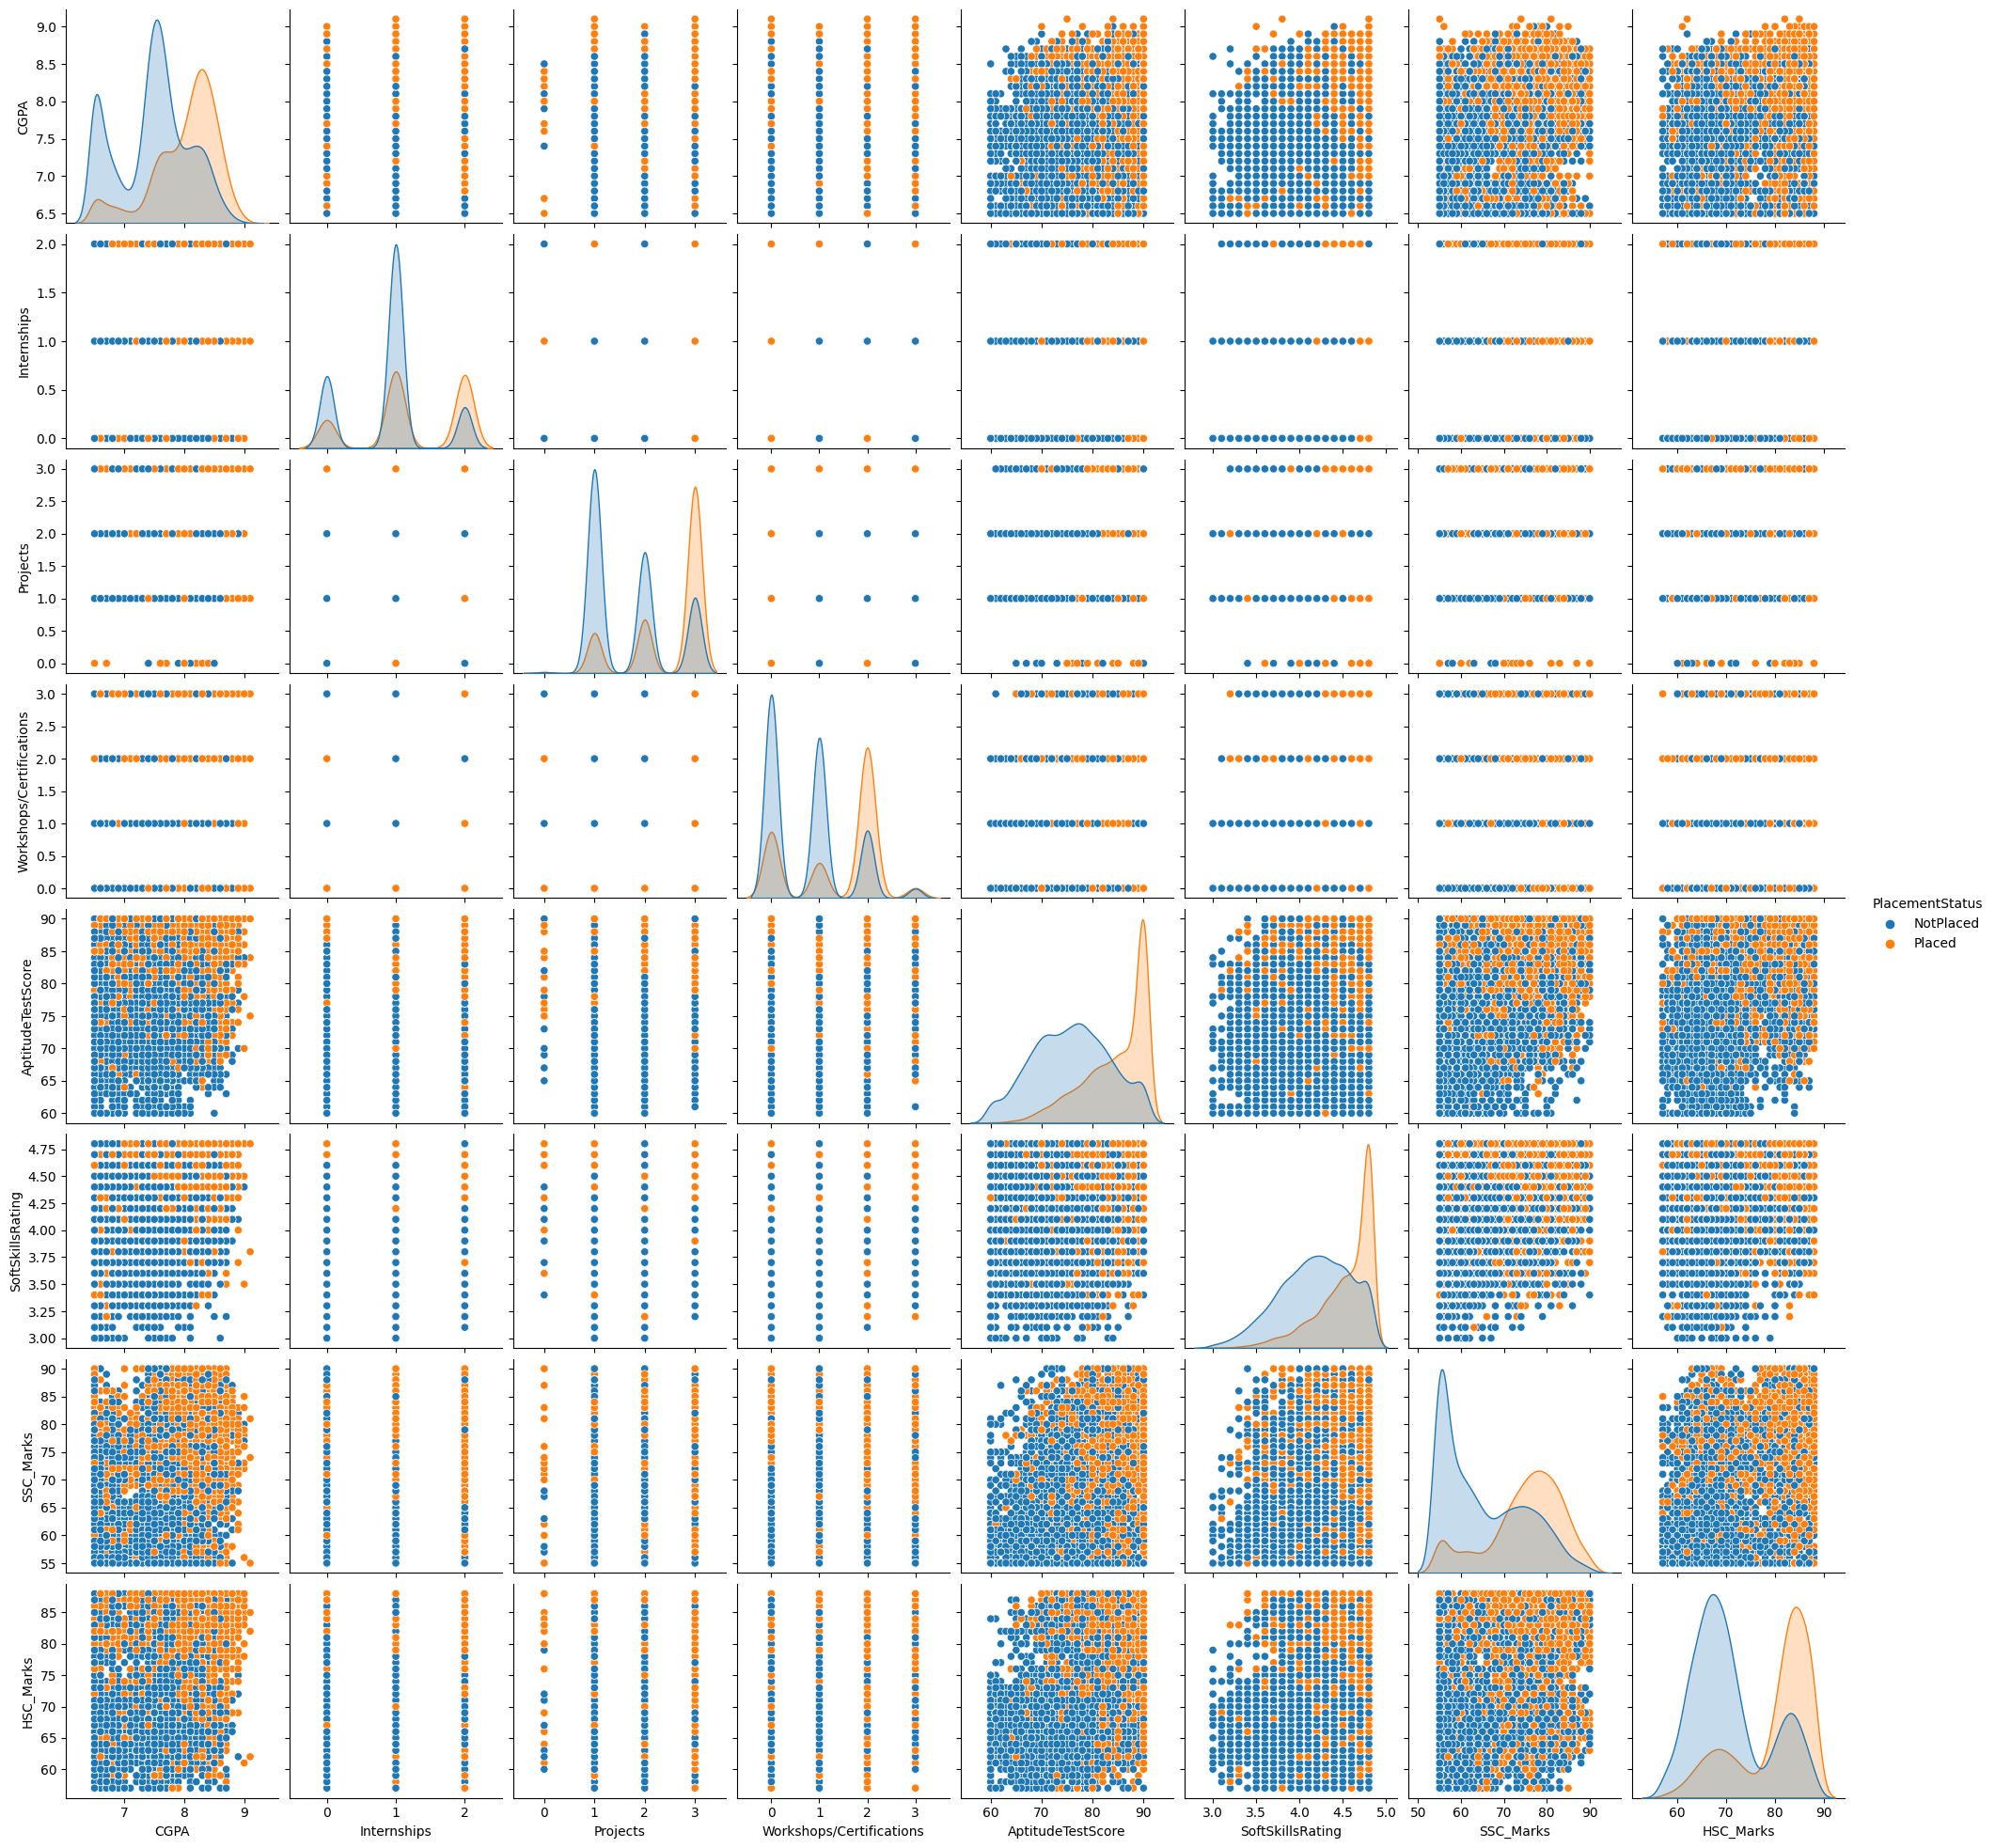

In [6]:
sns.pairplot(df,hue='PlacementStatus')

In [7]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


*THERE was an future update issuse in Pairplot*
    *#edit ,i used warnings to supresss that*

**DATA PREPARATION**

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
Encoder = LabelEncoder()
Encoder.fit(df['ExtracurricularActivities'])
df['ExtracurricularActivities'] = Encoder.transform(df['ExtracurricularActivities'])
Encoder.fit(df['PlacementTraining'])
df['PlacementTraining']=Encoder.transform(df['PlacementTraining'])
Encoder.fit(df['PlacementStatus'])
df['PlacementStatus']=Encoder.transform(df['PlacementStatus'])


In [10]:
df.head()


,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,,,,,,,,,,,
1,7.5,1,1,1,65,4.4,0,0,61,79,0
2,8.9,0,3,2,90,4.0,1,1,78,82,1
3,7.3,1,2,2,82,4.8,1,0,79,80,0
4,7.5,1,1,2,85,4.4,1,1,81,80,1
5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(['PlacementStatus'],axis=1)
y = df['PlacementStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**LOGISTIC REGRESSION**

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
LR = LogisticRegression(max_iter=500)

In [15]:
LR.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [16]:
pred_LR = LR.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
print('classification_report:')
print(classification_report(y_test,pred_LR))

classification_report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1733
           1       0.75      0.76      0.76      1267

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000



In [19]:
print('confusion_matrix:')
print(confusion_matrix(y_test,pred_LR))

confusion_matrix:
[[1418  315]
 [ 301  966]]


In [20]:
print('accuary by_LR:')
print(accuracy_score(y_test,pred_LR))

accuary by_LR:
0.7946666666666666


**RANDOM FOREST**

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
RF = RandomForestClassifier()

In [23]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
pred_RF = RF.predict(X_test)

In [25]:
print('classification_report:')
print(classification_report(y_test,pred_RF))

classification_report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1733
           1       0.75      0.73      0.74      1267

    accuracy                           0.78      3000
   macro avg       0.78      0.77      0.77      3000
weighted avg       0.78      0.78      0.78      3000



In [26]:
print('confusion_matrix:')
print(confusion_matrix(y_test,pred_RF))

confusion_matrix:
[[1421  312]
 [ 345  922]]


In [27]:
print('accuary by_RF:')
print(accuracy_score(y_test,pred_RF))

accuary by_RF:
0.781


**CONCLUSION**
* accuracy by Logistic Regression = 0.7946666666666666
* accuary by Random_Forest = 0.78

